In [91]:
from gonaibo import Attenuation
from kalpana.plotting import plot_nc

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.feature as cf
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

# Storm Surge Attenuation Analysis 
## Visualizing spatial distribution of attenuation at Grand-Pierre Bay, Haiti

The LaGonaveFM Project is also available to clone and run with ADCIRC at this [Github repo](https://github.com/aesgeorges/LaGonaveFM). Compiling ADCIRC and getting running the simulations will generate the outputs necessary for this notebook to function.

You can also reach out to me at [aes.georges@gmail.com](mailto:aes.georges@gmail.com) if you would like to have any output files for testing.

## Defining filepaths and scenario variables

In [50]:
mangrove_dir = 'Gonave_SLR_mangrove/'
nomangrove_dir = 'Gonave_SLR_nomangrove/'
# Change the root path to point to your output data location
root_m = f'/home/aesgeorges/LaGonaveFM/sims/{mangrove_dir}'
root_nm = f'/home/aesgeorges/LaGonaveFM/sims/{nomangrove_dir}'

In [51]:
# IPCC SLR scenario names and projection horizons
scenarios = ['SSP1', 'SSP2', 'SSP3', 'SSP5']
horizons = [2030, 2050, 2070, 2100]

## Initializing Attenuation Object and pulling data

In [52]:
runs = Attenuation(mangrove_root=root_m, nomangrove_root=root_nm, 
                     scenarios=scenarios, horizons=horizons,
                     baseline_path=root_m+'S0/')

Calculate storm surge attenuation provided per scenario

In [53]:
# "Protection" is defined as the difference in coastal flooding between mangrove and nomangrove cases for a given scenario
protection = runs.compute_scenarios_protection()
# The package returns the data as a dictionary, I recommend you turning it into an xarray for better user experience.

## Quick Visualization of Attenuation

In [54]:
# Choose a scenario and horizon to visualization
proj = scenarios[2] # for SSP3
year = horizons[2] # for 2070

NoMangrove vs Mangrove flood extents

/tmp/ipykernel_111130/221043950.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  ax.tricontour(tri, aux_m, levels=0, colors='r', extend='neither', label='Mangrove')
/tmp/ipykernel_111130/221043950.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  ax.tricontour(tri, aux_nm, levels=0, colors='b', extend='neither', label='No Mangrove')


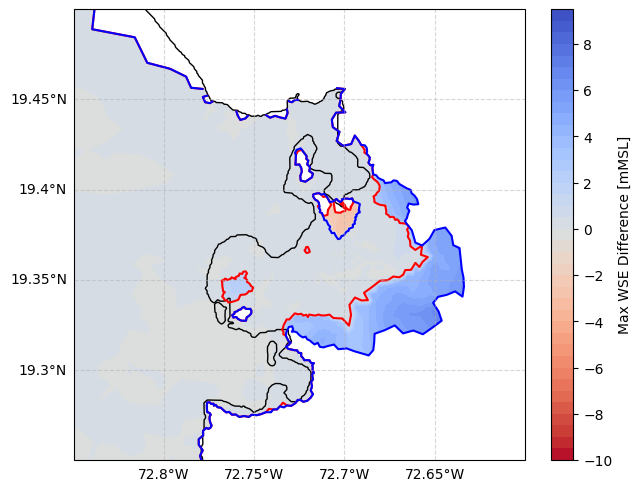

In [114]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},
                       constrained_layout = True)

# grab data for chosen scenario
run = protection[proj][year]

# Setting up cell triangulation for plotting
# Plotting mangrove v no mangrove flood extents
tri = mpl.tri.Triangulation(run['x'][:].data, run['y'][:].data, run['element'][:,:] - 1)
aux_m = run['zeta_mangrove'][:].data
aux_nm = run['zeta_nomangrove'][:].data

ax.tricontour(tri, aux_m, levels=0, colors='r', extend='neither', label='Mangrove')
ax.tricontour(tri, aux_nm, levels=0, colors='b', extend='neither', label='No Mangrove')

# Plotting Protection
m = plot_nc(run, 'protection', levels=np.arange(-10, 10, 0.5), cbar=True, cb_label='Max WSE Difference [mMSL]', cmap='coolwarm_r', fig=fig, ax=ax)

# Other plotting artifacts to enhance visualization, you're welcome to add your own (shapefiles of natural feature, coastlines, settlement boundaries, etc...)
coast = cf.GSHHSFeature(scale='full', levels=[1,2,3,4], alpha=1.0, edgecolor='black')
ax.add_feature(coast)

gl = ax.gridlines(draw_labels=True, alpha=0.5, linestyle='--', zorder=10)
gl.top_labels = False
gl.right_labels = False

# Limiting your extent to the actual AOI and not your whole model domain
ax.set_extent([-72.85, -72.6, 19.25, 19.5], crs=ccrs.PlateCarree())
